## Hypothesis Testing Exercises in Practice

#### capture all outcomes, negative, positive, and no change within your hypotheses

#### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?

Improved question: has there been a measureable change (AVG m/s on speed test) in connectivity since we switched internet providers?

H0: Null hypothesis: There has been no change above normal (1 std from mean speed before change) to the latency due to internet provider change, or an improvement in latency (increase in measured speeds)

H1: Alternate hypothesis: There has been a measureable change above normal (>1 std from mean speed before change) to the latency due to internet provider change.

True Positive Result (H1 more likely true): The mean internet speed measured by a speed test in the consumer's home while connected to home Wifi router with direct line of sight to router and no unreasonable impedence, observed an average increase in latency, measured in m/s, greater than one std from the mean speed recorded with the previous internet service provider. Speeds were measured in m/s of latency, and recorded 4x daily at 2x peak usage times and 2x off peak usage times for the network.

True Negative Result (H0 more likely true): The mean internet speed measured by a speed test in the consumer's home while connected to home Wifi router with direct line of sight to router and no unreasonable impedence, observed an average decrease in latency, measured in m/s, but not greater than one std from the mean speed recorded with the previous internet service provider. Speeds were measured in m/s of latency, and recorded 4x daily at 2x peak usage times and 2x off peak usage times for the network.

False Positive Result: Type 1 Error: Observed a drop in measured speed due to cat sitting on the warm home router and impeding the home Wifi signal strength. Leads to an inference of reduced home wifi speeds, not caused by ISP controllable conditions.

False Negative Result: Type 2 Error: Observed an increase in measured speed due to ISP load balancing in your favor, leading to massive increase in connectivity for a basic subscriber. Leads to an inference of increased home wifi speeds.

2. Is the website redesign any good?

Improved Question: since the website redesign, has there been an observable increase in total traffic to the site, an increase in average time spent on the site, or an increase in revenue generated per customer visit (via direct sales or ad spending by advertisers on the site)?

H0: Null hypothesis: There has been no change above normal rates (1 stddev from mean for traffic, visit length per customer, or revenue per customer) due to the website redesign, or there has been a negative (greater than 1 std in any of the above metrics) change since the website redesign/relaunch.

H1: Alternate hypothesis: There has been a measureable change above normal rates (1 std from mean for traffic, visit length per customer, or revenue per customer) due to the website redesign.

True Positive Result (H1 more likely true): A measured increase above 1 stddev in customer traffic to the website, as well as revenue per customer visit measured in average sales

True Negative Result (H0 more likely true): Traffic and sales since website redesing have dropped a meaningful amount.

False Positive Result: Type 1 Error: you believe website visits have increased. when they ahve actually fallen. You embrace the alternate hypothesis, when the null hypothesis is actually true.

False Negative Result: Type 2 Error: you believe website visits have fallen, when they ahve actually risen. You embrace the null hypothesis, when the alternate hypothesis is actually true.

3. Is our television ad driving more sales?

Improved Question: Have we seen an increased level of sales in terms of aggregate revenue, and/or an increased spend per customer since launch of new ad campaign compared with the previous cyclical trends of our underlying business?

H0: Null hypothesis: There has been no change above normal rates (1 std from mean for traffic, visit length per customer, or revenue per customer) due to the website redesign, or there has been a negative change since the website redesign/relaunch.

H1: Alternate hypothesis: There has been a measureable change above normal rates (1 std from mean for traffic, visit length per customer, or revenue per customer) due to the website redesign.

True Positive Result (H1 more likely true): 

True Negative Result (H0 more likely true): 

False Positive Result: Type 1 Error: 

False Negative Result: Type 2 Error: 

## T-Test Exercises

## Note:
### **measuring difference between means, no directionality in hypothesis: 2 tailed**
### directionality in hypothesis = 1 tailed test

### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

# is there a difference? use a t-test to determine this:

# two samples = independent t-test (aka Two Sample t-test)
# two tailed test

#Hypotheses
#H0: There is no difference for average sales time between 1 and 2
#H1: There is a difference for average sales time between 1 and 2

# first: plot distributions in histograms

#
a = 0.05

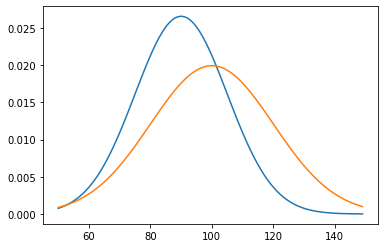

In [2]:
#asssume they are normally distributed arrays. visualize this way:
x = np.arange(50, 150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office1')
plt.plot(x, y2, label = 'Office2')

#### *Calculating t and p directly from mean and std dev*

In [3]:
#scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)
t, p = scipy.stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [4]:
if p/2 < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## 2.Load the mpg dataset and use it to answer the following questions:

In [5]:
from pydataset import data
mpg = data('mpg')

In [6]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [7]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### A.Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [8]:
mpg["avg_mpg"] = (mpg.cty + mpg.hwy)/2
mpg.head()

# harmonic mean

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [9]:
zero_eight_cars_mpg = mpg[mpg.year == 2008].avg_mpg
nine_nine_cars_mpg = mpg[mpg.year == 1999].avg_mpg

In [10]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [11]:
mpg.avg_mpg.describe()

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: avg_mpg, dtype: float64

In [12]:
#plot the distributions

<AxesSubplot:>

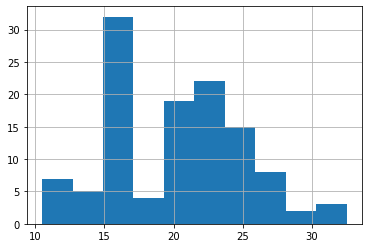

In [13]:
zero_eight_cars_mpg.hist()

<AxesSubplot:>

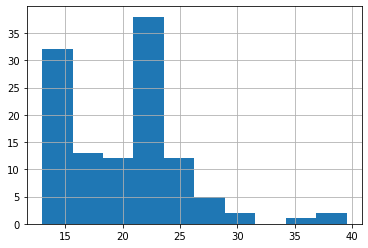

In [14]:
nine_nine_cars_mpg.hist()

### Hypotheses:
H0: avg_mpg of1999 <= 2008 model year.

H1: avg_mpg of 2008 > 1999 model year.

>> Run a Two sample, two tailed t-test to establish (**diffference = two tailed**). Use a=0.05

In [15]:
a = 0.05

In [16]:
nine_nine_cars_mpg.var()

27.122605363984682

In [17]:
zero_eight_cars_mpg.var()

24.097480106100797

>> validate assumptions:
1. independent samples: Yes
2. normal distribution: No, but 117 sample size for each group
3. equal variance: they are similar, but run the Levene test

In [18]:
stat, p_val = stats.levene(zero_eight_cars_mpg, nine_nine_cars_mpg)
stat, p_val

(0.033228136671080453, 0.855517569468803)

In [19]:
t, p = stats.ttest_ind(zero_eight_cars_mpg, nine_nine_cars_mpg)
t, p

(-0.21960177245940962, 0.8263744040323578)

In [20]:
t

-0.21960177245940962

In [21]:
p

0.8263744040323578

In [22]:
if p/2 < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


###  B. Are compact cars more fuel-efficient than the average car?

In [23]:
cc_fuel_efficiency = mpg[mpg["class"] == "compact"].avg_mpg.sum()/mpg[mpg["class"] == "compact"].avg_mpg.count()
cc_fuel_efficiency
#this is now a scalar value. better to create an array, then use the .avg function

24.21276595744681

In [24]:
cc_cars = mpg[mpg["class"] == 'compact']
cc_cars.avg_mpg.var()

12.442876965772433

<AxesSubplot:>

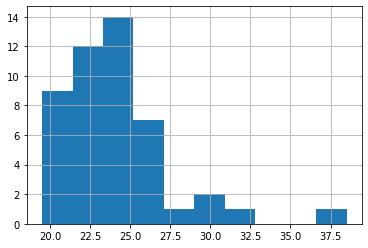

In [25]:
cc_cars.avg_mpg.hist()

In [26]:
cc_cars.size

564

In [27]:
cc_cars.describe()

,displ,year,cyl,cty,hwy,avg_mpg
count,47.000000,47.000000,47.000000,47.00000,47.000000,47.000000
mean,2.325532,2003.212766,4.595745,20.12766,28.297872,24.212766
std,0.452274,4.539374,0.900714,3.38550,3.781620,3.527446
min,1.800000,1999.000000,4.000000,15.00000,23.000000,19.500000
25%,2.000000,1999.000000,4.000000,18.00000,26.000000,22.000000
50%,2.200000,1999.000000,4.000000,20.00000,27.000000,23.500000
75%,2.800000,2008.000000,6.000000,21.00000,29.000000,25.250000
max,3.300000,2008.000000,6.000000,33.00000,44.000000,38.500000


In [28]:
average_car_fuel_efficiency = (mpg.avg_mpg.sum()/len(mpg))
average_car_fuel_efficiency

20.14957264957265

In [29]:
mpg.avg_mpg.var()

25.50542900113715

<AxesSubplot:>

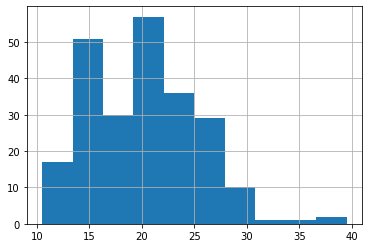

In [30]:
mpg.avg_mpg.hist()

### Hypotheses:
H0: the fuel efficiency of compact cars is less than or equal to the average fuel effciency.

H1: the fuel efficiency of compact cars is greater than the average fuel efficiency.

>> Run a one sample, single tailed t-test to establish diffference. Use a=0.05

>> looking for t>0, p < a (0.05)

>> validate assumptions:
1. independent samples: No >> one sample test
2. normal distribution: No, but 564 sample size for each group
3. equal variance: N/A, one sample test, single tailed

In [31]:
a = 0.05

In [32]:
t, p = stats.ttest_1samp(cc_cars.avg_mpg, average_car_fuel_efficiency) #array v scalar
t, p/2

(7.896888573132535, 2.0992818971585668e-10)

In [33]:
if p/2 < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### C. Do manual cars get better gas mileage than automatic cars?

In [34]:
mpg.sample(5)
#continuous variable: mileage
#categorical

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,10.5
152,nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4,15,17,r,suv,16.0
117,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact,24.0
50,dodge,dakota pickup 4wd,3.7,2008,6,auto(l4),4,14,18,r,pickup,16.0


In [35]:
manual_cars = mpg[mpg.trans.str.contains('manual')]
manual_cars.describe()
manual_cars.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0


In [36]:
manual_cars_mpg = manual_cars.avg_mpg
manual_cars_mpg.describe()

count    77.000000
mean     22.227273
std       5.160927
min      10.500000
25%      19.500000
50%      22.000000
75%      25.000000
max      39.500000
Name: avg_mpg, dtype: float64

In [37]:
manual_cars_mpg.var()

26.635167464114826

<AxesSubplot:>

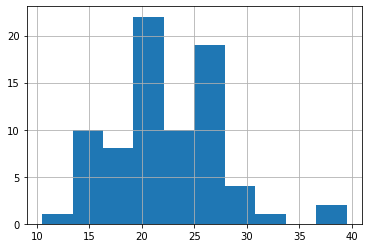

In [38]:
manual_cars_mpg.hist()

In [39]:
automatic_cars = mpg[mpg.trans.str.contains("auto")]
automatic_cars.describe()

,displ,year,cyl,cty,hwy,avg_mpg
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,3.719745,2003.757962,6.203822,15.968153,22.292994,19.130573
std,1.272210,4.506976,1.584131,3.848777,5.623054,4.684312
min,1.600000,1999.000000,4.000000,9.000000,12.000000,10.500000
25%,2.500000,1999.000000,4.000000,13.000000,17.000000,15.000000
50%,3.800000,2008.000000,6.000000,16.000000,22.000000,19.000000
75%,4.700000,2008.000000,8.000000,18.000000,26.000000,22.500000
max,6.500000,2008.000000,8.000000,29.000000,41.000000,35.000000


In [40]:
automatic_cars_mpg = automatic_cars.avg_mpg
automatic_cars_mpg.describe()

count    157.000000
mean      19.130573
std        4.684312
min       10.500000
25%       15.000000
50%       19.000000
75%       22.500000
max       35.000000
Name: avg_mpg, dtype: float64

In [41]:
automatic_cars_mpg.var()

21.942777233382337

<AxesSubplot:>

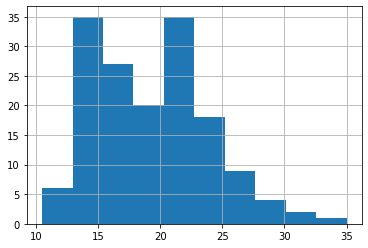

In [42]:
automatic_cars_mpg.hist()

### Hypotheses:
H0: the fuel efficiency of manual cars is less than or equal to the automatic cars.

H1: the fuel efficiency of manual cars is greater than automatic cars.

>> Run a two sample, single tailed t-test to establish diffference. Use a=0.05

>> validate assumptions:
1. independent samples: Yes
2. normal distribution: No, but 564 sample size for each group
3. equal variance: no, these are quite different

In [43]:
a = 0.05

In [76]:
t, p = stats.ttest_ind(manual_cars_mpg, automatic_cars_mpg) #array v scalar
t, p

(4.593437735750014, 7.154374401145683e-06)

In [77]:
if p/2 < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [78]:
stat, p_val = stats.levene(automatic_cars_mpg, manual_cars_mpg)
stat, p_val

(0.20075824847529639, 0.6545276355131857)

## This p-value is high enough that we fail to reject the Levene null hypothesis of insignificant variance. These values are similar enough

In [47]:
t, p = stats.ttest_ind(manual_cars_mpg, automatic_cars_mpg)
t, p/2

## t-value is pointed toward higer manual value, and p-value is lower than a. We reject the null hypothesis

(4.593437735750014, 3.5771872005728416e-06)

In [48]:
manual_cars_mpg.mean(), automatic_cars_mpg.mean() #this is backed up by the statistical means

(22.227272727272727, 19.130573248407643)

# Correlation Exercises

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

from scipy import stats
from pydataset import data

## 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

**note: you can get the p-value from t, with:
        p = stats.t.sf(t)**
        from SciPy

** important formula:
    corr, p = stats.pearsonr(x, y) ## also use r instead of corr **

In [50]:
df = pd.read_csv('telco_churn_new.csv')
df.head()
## put the CSV in the same directory as your notebook, then import

,Unnamed: 0,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0,0002-ORFBO,Female,No,Yes,Yes,1 line,DSL,1 YR,Mailed check,65.6,593.30,No,9.0
1,1,0003-MKNFE,Male,No,No,No,2+ lines,DSL,Monthly,Mailed check,59.9,542.40,No,9.1
2,2,0004-TLHLJ,Male,No,No,No,1 line,Fiber,Monthly,Electronic check,73.9,280.85,Yes,3.8
3,3,0011-IGKFF,Male,Yes,Yes,No,1 line,Fiber,Monthly,Electronic check,98.0,1237.85,Yes,12.6
4,4,0013-EXCHZ,Female,Yes,Yes,No,1 line,Fiber,Monthly,Mailed check,83.9,267.40,Yes,3.2


In [51]:
## Tenure v. Monthly Charges

x = df.tenure
y = df.monthly_charges

r, p = stats.pearsonr(x, y)
r, p


(0.2471848922499011, 1.2811368994929208e-98)

Text(0, 0.5, 'Monthly Charges')

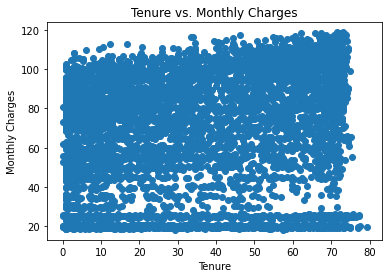

In [52]:
plt.scatter(x,y)
plt.title("Tenure vs. Monthly Charges")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")

In [53]:
## Tenure v. Total Charges

df = df.dropna(axis=0, how='any')


x = df.tenure
y = df.total_charges

r, p = stats.pearsonr(x, y)
r, p

(0.8258191824783714, 0.0)

In [54]:
#remove the null rows:
#df.total_charges = df.total_charges.replace('', NaN)

Text(0, 0.5, 'Total Charges')

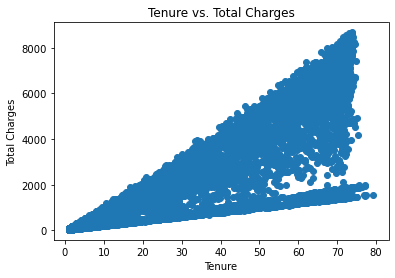

In [55]:
plt.scatter(x,y)
plt.title("Tenure vs. Total Charges")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")

# high heteroskedasticity >> lots of variance from the line of best fit

In [56]:
## Control for phone and internet service
df.head()

,Unnamed: 0,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0,0002-ORFBO,Female,No,Yes,Yes,1 line,DSL,1 YR,Mailed check,65.6,593.30,No,9.0
1,1,0003-MKNFE,Male,No,No,No,2+ lines,DSL,Monthly,Mailed check,59.9,542.40,No,9.1
2,2,0004-TLHLJ,Male,No,No,No,1 line,Fiber,Monthly,Electronic check,73.9,280.85,Yes,3.8
3,3,0011-IGKFF,Male,Yes,Yes,No,1 line,Fiber,Monthly,Electronic check,98.0,1237.85,Yes,12.6
4,4,0013-EXCHZ,Female,Yes,Yes,No,1 line,Fiber,Monthly,Mailed check,83.9,267.40,Yes,3.2


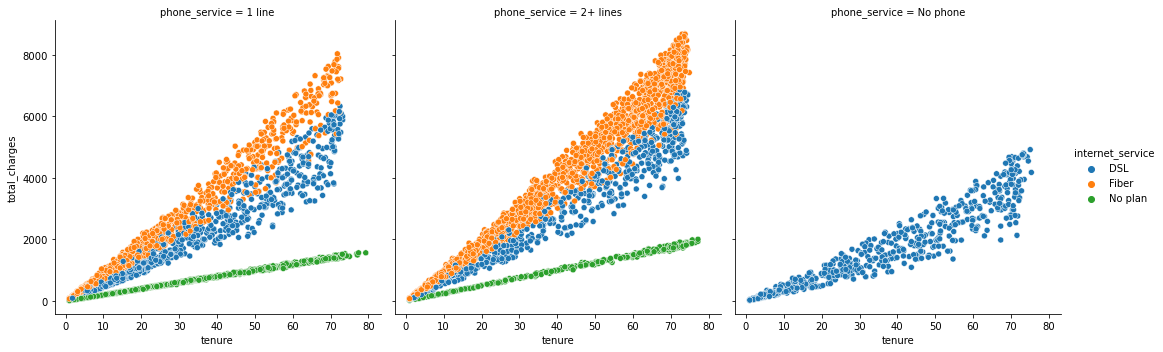

In [57]:
## Control for phone service graphically
sns.relplot(data=df, x=df.tenure, y=df.total_charges, col=df.phone_service, hue = df.internet_service)

#def corr_tenure_and_monthly(df):
#    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index = ['r', 'p'])

#df.groupby(['internet_service_type']).apply(corr_tenure_)


No Phone plan: r =0.9543062640520061 , p =0.0

One Phone line: r =0.772080668041668 , p =0.0

Two Phone lines: r =0.8418257674637378 , p =0.0



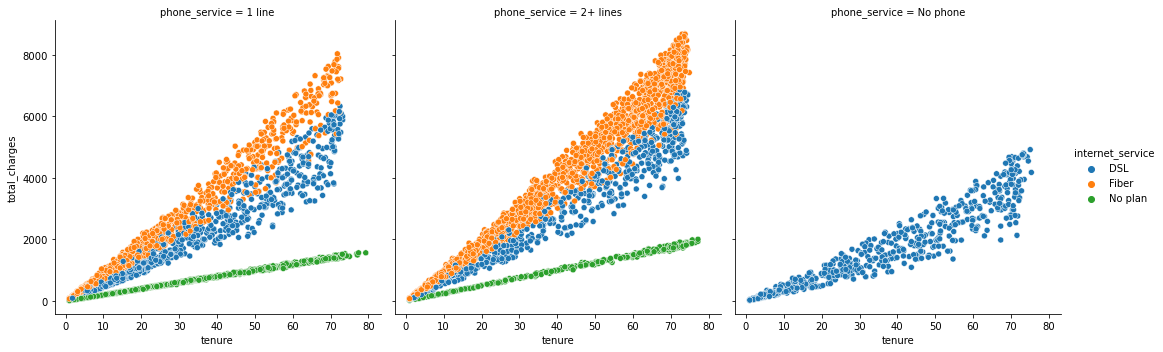

In [58]:
## control for Phone Service.

no_phone = df[df.phone_service == "No phone"]
r, p = stats.pearsonr(x=no_phone.tenure, y=no_phone.total_charges)
print(f'No Phone plan: r ={r} , p ={p}\n')

one_phone = df[df.phone_service == "1 line"]
r, p = stats.pearsonr(x=one_phone.tenure, y=one_phone.total_charges)
print(f'One Phone line: r ={r} , p ={p}\n')

two_phones = df[df.phone_service == "2+ lines"]
r, p = stats.pearsonr(x=two_phones.tenure, y=two_phones.total_charges)
print(f'Two Phone lines: r ={r} , p ={p}\n')

sns.relplot(data=df, x=df.tenure, y=df.total_charges, col = df.phone_service, hue = df.internet_service) 

DSL: r =0.9418393863558967 , p =0.0

Fiber: r =0.9859664567144112 , p =0.0

No plan: r =0.9843017870543533 , p =0.0



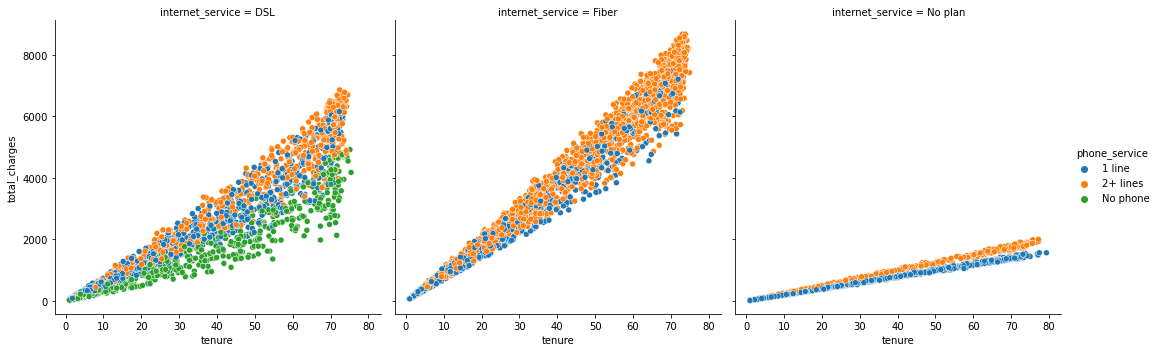

In [59]:
## control for Internet Service.

dsl = df[df.internet_service == "DSL"]
r, p = stats.pearsonr(x=dsl.tenure, y=dsl.total_charges)
print(f'DSL: r ={r} , p ={p}\n')

fiber = df[df.internet_service == "Fiber"]
r, p = stats.pearsonr(x=fiber.tenure, y=fiber.total_charges)
print(f'Fiber: r ={r} , p ={p}\n')

no_plan = df[df.internet_service == "No plan"]
r, p = stats.pearsonr(x=no_plan.tenure, y=no_plan.total_charges)
print(f'No plan: r ={r} , p ={p}\n')

sns.relplot(data=df, x=df.tenure, y=df.total_charges, col=df.internet_service, hue = df.phone_service)

## 2. Use the employees database.
## Is there a relationship between how long an employee has been with the company and their salary?
## Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [60]:
import env
import datetime
from env import get_db_url
url = get_db_url('employees')

In [61]:
df = pd.read_sql("SELECT * FROM salaries JOIN employees USING(emp_no);", url)
df.head()

## his query:
## SELECT DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure, s.salary

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,60117,1986-06-26,1987-06-26,1953-09-02,Georgi,Facello,M,1986-06-26
1,10001,62102,1987-06-26,1988-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
2,10001,66074,1988-06-25,1989-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
3,10001,66596,1989-06-25,1990-06-25,1953-09-02,Georgi,Facello,M,1986-06-26
4,10001,66961,1990-06-25,1991-06-25,1953-09-02,Georgi,Facello,M,1986-06-26


In [62]:
## convert future month to now()

def handle_future_date(to_date):
    if to_date == '9999-01-01':
        return datetime.datetime.now().date()

In [64]:
df['usable_to_date'] = df.to_date.apply(handle_future_date).str.astype(int)
df.head()

AttributeError: 'StringMethods' object has no attribute 'astype'

In [65]:
df.usable_to_date.dtypes

AttributeError: 'DataFrame' object has no attribute 'usable_to_date'

In [ ]:
df['months_employed'] = 
((df.usable_to_date - df.from_date)/np.timedelta64(1, 'M').astype(int)

## Chi Squared Exercises:

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [66]:
index = ['Use a Macbook', "Doesn't Use a Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[40, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup Student,Not Codeup Student
Use a Macbook,40,20
Doesn't Use a Macbook,1,30


In [ ]:
# Null hypothesis: using Macbook is independent of being a Codeup student

In [67]:
a = 0.05

In [68]:
# Now test:
chi2, p, degf, expected = stats.chi2_contingency(observed)
#all we need is p, to determine relationship
p

2.9848590149091914e-08

In [69]:
if p < a:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

we reject the null hypothesis


### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [70]:
from scipy import stats
from pydataset import data

df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
# Let's check for a relationship between manufacturer and drv:
# Null: manufacturer and drv are independent
# set a:

In [71]:
a = 0.05

In [ ]:
#create a crosstab of the variables:
#variables must be categorical for a Chi2 test

In [72]:
observed = pd.crosstab(df.manufacturer, df.drv)
observed

drv,4,f,r
manufacturer,,,
audi,11,7,0
chevrolet,4,5,10
dodge,26,11,0
ford,13,0,12
honda,0,9,0
...,...,...,...
nissan,4,9,0
pontiac,0,5,0
subaru,14,0,0


In [73]:
#Let's do a chi_squared test to determine relationship:
chi2, p, degf, expected = stats.chi2_contingency(observed)
#only need the p-value:
p

5.12809407673465e-34

In [74]:
if p < a:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

we reject the null hypothesis


## 3. Use the data from the employees database to answer these questions:

In [ ]:
from env import get_db_url
url = get_db_url('employees')

In [ ]:
df = pd.read_sql("""
                SELECT e.gender, d.dept_name
                FROM employees AS e 
                JOIN dept_emp AS de USING(emp_no) 
                JOIN departments AS d USING(dept_no)
                WHERE (de.to_date > now()
                AND (d.dept_name = 'Sales' OR d.dept_name = 'Marketing'));
                """, url)
df.head()

### a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [ ]:
df.size

In [ ]:
#Let's set a null hypothesis:
#Null: gender and employment in marketing/sales is independent

In [ ]:
#Set a:
a = 0.05

In [ ]:
observation = pd.crosstab(df.gender, df.dept_name).T
observation

In [ ]:
#determine relationship with Chi2 test:
chi2, p, degf, expected = stats.chi2_contingency(observation)
p

In [ ]:
#Set criteria:
if p < a:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

### b. Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
df = pd.read_sql("""
                SELECT e.gender, dm.emp_no
                FROM employees AS e  
                LEFT JOIN dept_manager AS dm USING(emp_no);
                """, url)
df.head()

In [ ]:
df.size

In [ ]:
df["is_manager"] = ~pd.isna(df.emp_no)
df.head()
# another way: 
# df["is_manager"] = df.emp_no.apply(lambda x: False if x==NaN else True)

In [ ]:
#create a crosstab to summarize the relationship in a tabular output
observation = pd.crosstab(df.gender, df.is_manager)
observation

In [ ]:
#Create null hypothesis:
#Gender and manager are independent variables

#Set a:
a = 0.05

In [ ]:
#Derive the chi2 values:
chi2, p, degf, expected = stats.chi2_contingency(observation)
p

In [ ]:
if p<a:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")